In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import requests
import gzip
import warnings
warnings.filterwarnings('ignore')

In [39]:
#função para baixar arquivo atualizado
def baixar_arquivo(url, arquivo):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(arquivo, 'wb') as f:
            f.write(response.raw.read())

In [40]:
#baixando arquivo atualizado
baixar_arquivo('https://data.brasil.io/dataset/covid19/caso.csv.gz', 'caso.csv.gz' )
with gzip.open('caso.csv.gz') as f:
  df = pd.read_csv(f)
#filtrando casos por estado
df_sp = df[(df['state'] == 'SP') & (df['place_type'] == 'state')]
df_sp.head()


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1398855,2021-03-09,SP,NaN,state,2134020,62101,372,True,45919049.0,46289333.0,35.0,4610.17660,0.0291
1398856,2021-03-08,SP,NaN,state,2117962,61584,371,False,45919049.0,46289333.0,35.0,4575.48611,0.0291
1398857,2021-03-07,SP,NaN,state,2113738,61463,370,False,45919049.0,46289333.0,35.0,4566.36089,0.0291
1398858,2021-03-06,SP,NaN,state,2107687,61417,369,False,45919049.0,46289333.0,35.0,4553.28877,0.0291
1398859,2021-03-05,SP,NaN,state,2093924,61064,368,False,45919049.0,46289333.0,35.0,4523.55622,0.0292


In [41]:
#conversão do campo data
df_sp['date'] = pd.to_datetime(df_sp['date'])
df_sp.dtypes

date                              datetime64[ns]
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
order_for_place                            int64
is_last                                     bool
estimated_population_2019                float64
estimated_population                     float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
dtype: object

Text(0, 0.5, 'Óbitos')

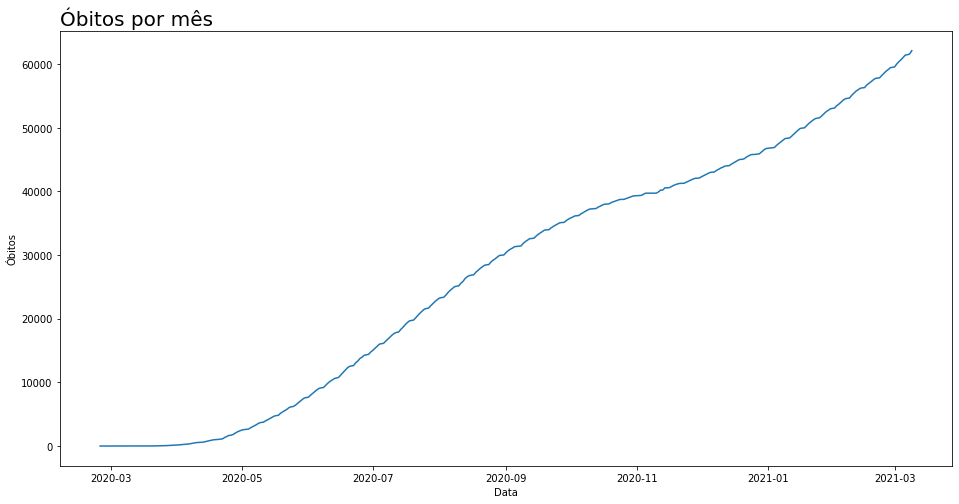

In [42]:
#óbitos por data
plt.figure(figsize=(16,8))
fig = sns.lineplot(x='date', y='deaths', data=df_sp)
fig.set_title('Óbitos por mês', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Óbitos')

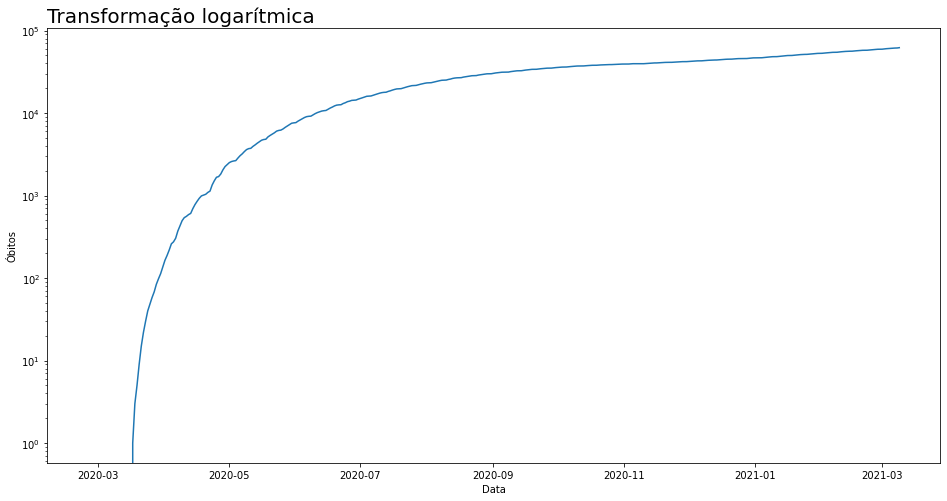

In [43]:
#transformação logarítmica
plt.figure(figsize=(16,8))
fig = sns.lineplot(x='date', y='deaths', data=df_sp)
fig.set_title('Transformação logarítmica', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Óbitos')
fig.set_yscale('log')

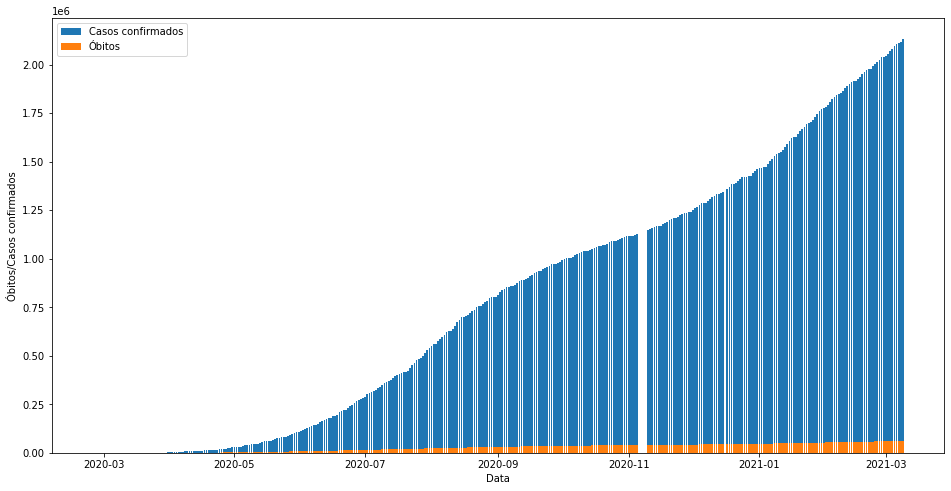

In [44]:
#comparação casos confirmados X mortes
plt.figure(figsize=(16,8))
fig = plt.bar(df_sp.date, df_sp.confirmed, label='Casos confirmados')
plt.bar(df_sp.date, df_sp.deaths, label='Óbitos')
plt.xlabel('Data')
plt.ylabel('Óbitos/Casos confirmados', rotation=90)
plt.legend()

In [45]:
df_sp.sort_values(by='date', inplace=True)


In [46]:
df_sp['acceleration_confirmed'] = df_sp['confirmed'].diff()
df_sp['acceleration_deaths'] = df_sp['deaths'].diff()
df_sp.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths
1399226,2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0,NaN,NaN
1399225,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0
1399224,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0
1399223,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0,1.0,0.0
1399222,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0,0.0,0.0


Text(0, 0.5, 'Casos confirmados')

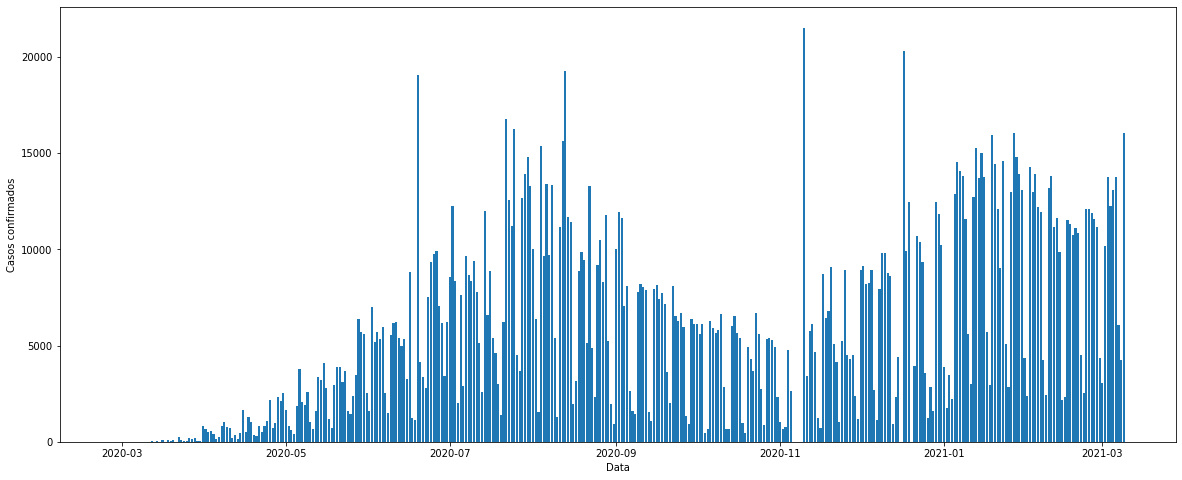

In [47]:
#aceleração dos novos casos
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.date, df_sp.acceleration_confirmed, label='Aceleração de novos casos')
plt.xlabel('Data')
plt.ylabel('Casos confirmados', rotation=90)

Text(0, 0.5, 'Óbitos')

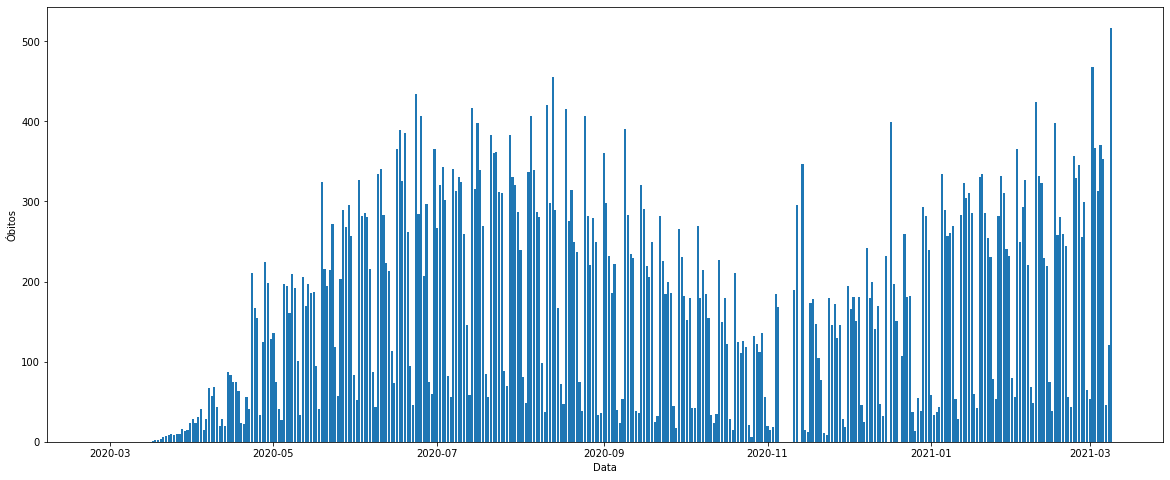

In [48]:
#aceleração dos óbitos
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.date, df_sp.acceleration_deaths, label='Aceleração de óbitos')
plt.xlabel('Data')
plt.ylabel('Óbitos', rotation=90)

In [49]:
df_sp['media_movel_mortes'] = df_sp['deaths'].rolling(window=14, center=False).mean()
df_sp.head(50)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,media_movel_mortes
1399226,2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0000,NaN,NaN,NaN
1399225,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0000,0.0,0.0,NaN
1399224,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000,0.0,0.0,NaN
1399223,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000,1.0,0.0,NaN
1399222,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0000,0.0,0.0,NaN
1399221,2020-03-01,SP,NaN,state,2,0,6,False,45919049.0,46289333.0,35.0,0.00432,0.0000,0.0,0.0,NaN
1399220,2020-03-02,SP,NaN,state,2,0,7,False,45919049.0,46289333.0,35.0,0.00432,0.0000,0.0,0.0,NaN
1399219,2020-03-03,SP,NaN,state,2,0,8,False,45919049.0,46289333.0,35.0,0.00432,0.0000,0.0,0.0,NaN
1399218,2020-03-04,SP,NaN,state,3,0,9,False,45919049.0,46289333.0,35.0,0.00648,0.0000,1.0,0.0,NaN
1399217,2020-03-05,SP,NaN,state,6,0,10,False,45919049.0,46289333.0,35.0,0.01296,0.0000,3.0,0.0,NaN


<BarContainer object of 372 artists>

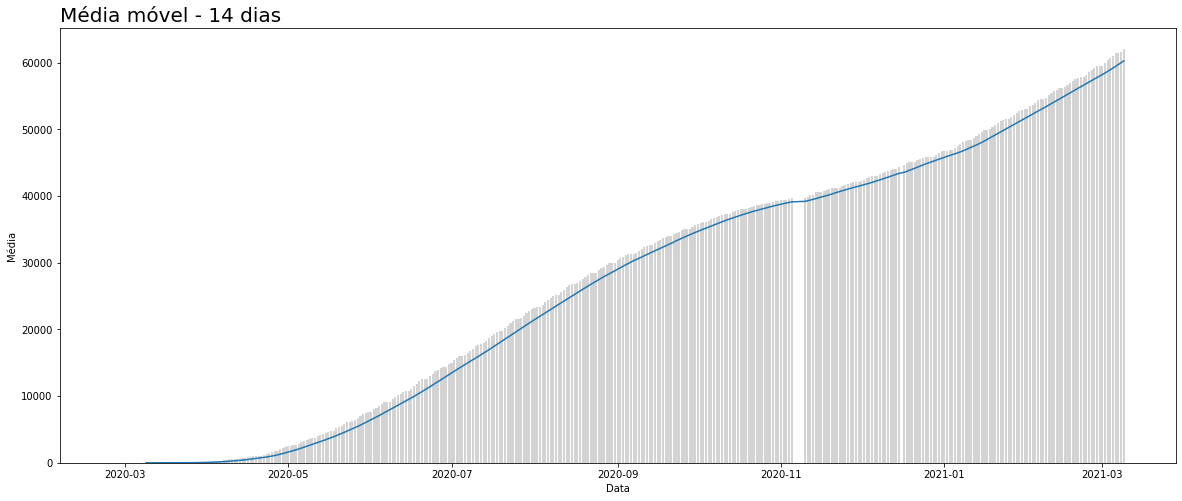

In [50]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='date', y='media_movel_mortes', data=df_sp)
fig.set_title('Média móvel - 14 dias', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Média')
plt.bar(df_sp['date'], df_sp['deaths'], color='lightgrey')

In [51]:
df_sp['month'] = pd.to_datetime(df_sp['date'])
df_sp['day'] = df_sp['month'].dt.day_name()
df_sp.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,media_movel_mortes,month,day
1399226,2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0,NaN,NaN,NaN,2020-02-25,Tuesday
1399225,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0,NaN,2020-02-26,Wednesday
1399224,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0,NaN,2020-02-27,Thursday
1399223,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0,1.0,0.0,NaN,2020-02-28,Friday
1399222,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0,0.0,0.0,NaN,2020-02-29,Saturday


In [52]:
dias = {'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo', 'Monday':'Segunda', 'Tuesday':'Terça',
       'Wednesday':'Quarta'}


In [53]:
df_sp['day'] = df_sp['day'].map(dias)


In [54]:
df_sp.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,media_movel_mortes,month,day
1399226,2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0,NaN,NaN,NaN,2020-02-25,Terça
1399225,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0,NaN,2020-02-26,Quarta
1399224,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0,0.0,0.0,NaN,2020-02-27,Quinta
1399223,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0,1.0,0.0,NaN,2020-02-28,Sexta
1399222,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0,0.0,0.0,NaN,2020-02-29,Sabado


In [55]:
dados_agrupados  = df_sp.groupby('day')['confirmed', 'deaths','acceleration_deaths'].mean().round()
dados_agrupados['day'] = dados_agrupados.index

In [56]:
dados_agrupados

,confirmed,deaths,acceleration_deaths,day
day,,,,
Domingo,812755.0,27847.0,54.0,Domingo
Quarta,769658.0,26583.0,223.0,Quarta
Quinta,787728.0,27135.0,224.0,Quinta
Sabado,794703.0,27269.0,181.0,Sabado
Segunda,799054.0,27361.0,39.0,Segunda
Sexta,803476.0,27609.0,194.0,Sexta
Terça,797703.0,27335.0,252.0,Terça


In [57]:
dados_agrupados = dados_agrupados.reindex(['Domingo', 'Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado'])
dados_agrupados

,confirmed,deaths,acceleration_deaths,day
day,,,,
Domingo,812755.0,27847.0,54.0,Domingo
Segunda,799054.0,27361.0,39.0,Segunda
Terça,797703.0,27335.0,252.0,Terça
Quarta,769658.0,26583.0,223.0,Quarta
Quinta,787728.0,27135.0,224.0,Quinta
Sexta,803476.0,27609.0,194.0,Sexta
Sabado,794703.0,27269.0,181.0,Sabado


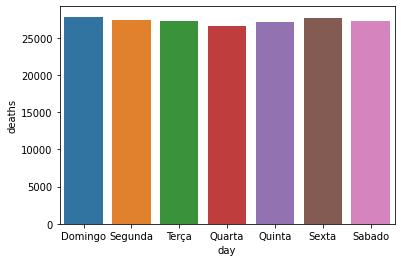

In [58]:
sns.barplot(dados_agrupados['day'], dados_agrupados.deaths)